<a href="https://colab.research.google.com/github/jhasankbharadwaj/iiith_course/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [ ]:
! pip install wikipedia

import wikipedia
import nltk# text processing
from nltk.util import ngrams # splitting the data into units
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=b2ca938529d4b68a712c00e909457c6655786dcc2de5412219dc3a9cb3248d21
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [60]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
topic3 = 'Image Processing'
wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
eng3 = wikipedia.page(topic3).content


wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content
fr3 = wikipedia.page(topic3).content


wikipedia.set_lang('ru')# russian

ru1 = wikipedia.page(topic1).content
ru2 = wikipedia.page(topic2).content
ru3 = wikipedia.page(topic3).content


This is what the text looks like:

In [35]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text
  # making the document to lowercase and removing the not alphabet text

In [37]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
eng3=cleanup(eng3)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
fr3=cleanup(fr3)
ru1=cleanup(ru1)
ru2=cleanup(ru2)


In [72]:
eng1

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody p

In [38]:
print(ru3)

processingjavapdeprocessingprocessingtheaestheticsandcomputationgroupmitmedialabprocessingprocessingsketchjavaprocessingjavapappletprocessingjavawindowslinuxmacosandroidjavascriptcanvasprocessinghelloworlddesignbynumberswiringarduinofritzingprocessingwiringideprocessingcwiringarduinowiringfritzingmobileprocessingprocessingjspjsiprocessingspdequilprocessingsdkwowcubeopensourcecinderopenframeworksclaclprocessingprocessingisocoderu


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

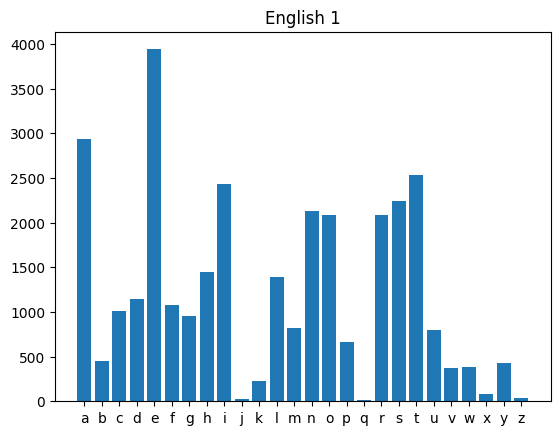

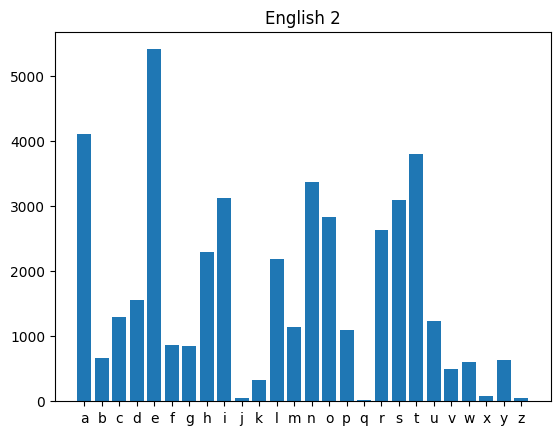

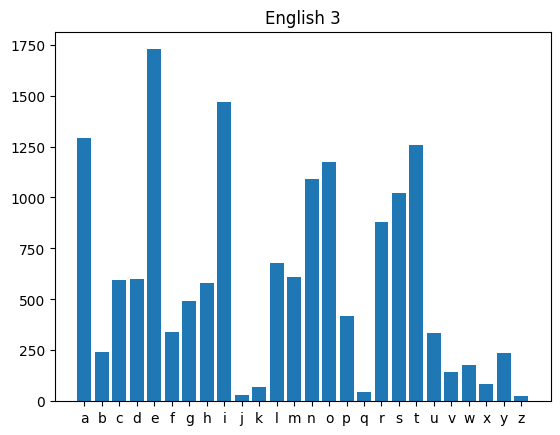

In [39]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()
unigram_eng3 = Counter(ngrams(eng3,1))
plothistogram(unigram_eng3)
plt.title('English 3')
plt.show()

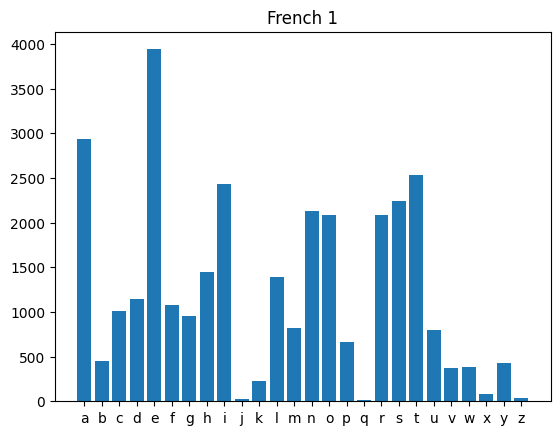

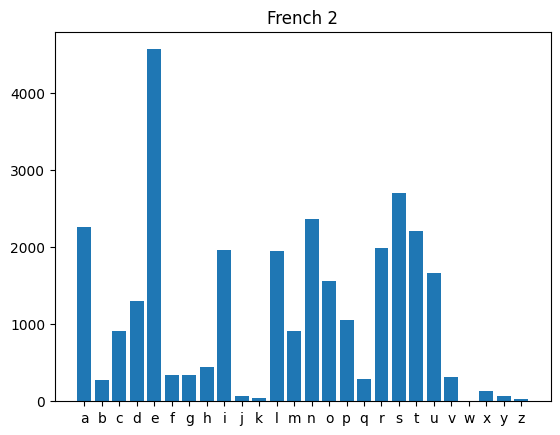

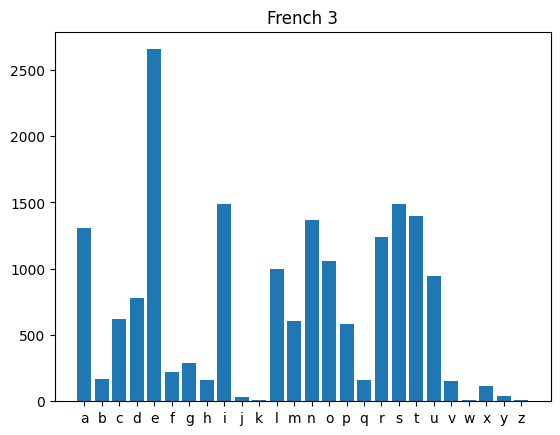

In [41]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()
unigram_fr3 = Counter(ngrams(fr3,1))
plothistogram(unigram_fr3)
plt.title('French 3')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

even when delt with russian language is mostly similar

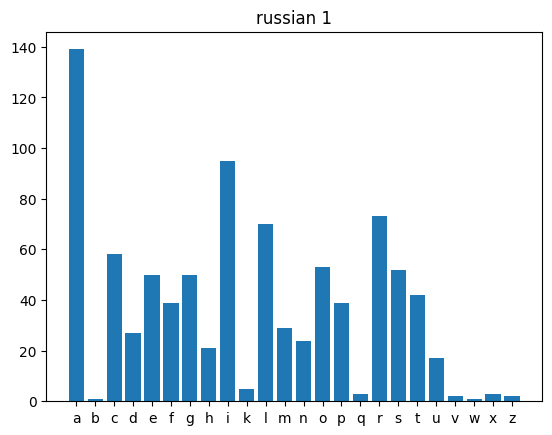

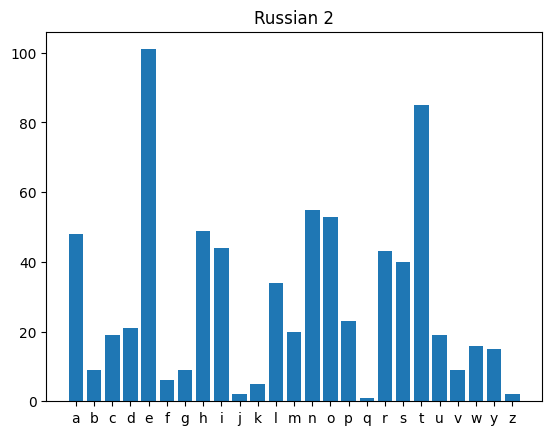

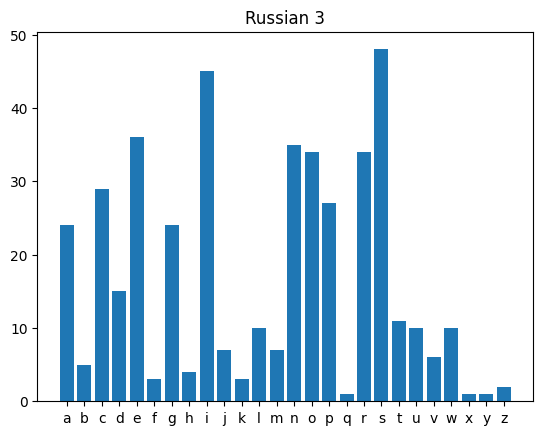

In [42]:
unigram_ru1 = Counter(ngrams(ru1,1))
plothistogram(unigram_ru1)
plt.title('russian 1')
plt.show()
unigram_ru2 = Counter(ngrams(ru2,1))
plothistogram(unigram_ru2)
plt.title('Russian 2')
plt.show()
unigram_ru3 = Counter(ngrams(ru3,1))
plothistogram(unigram_ru3)
plt.title('Russian 3')
plt.show()

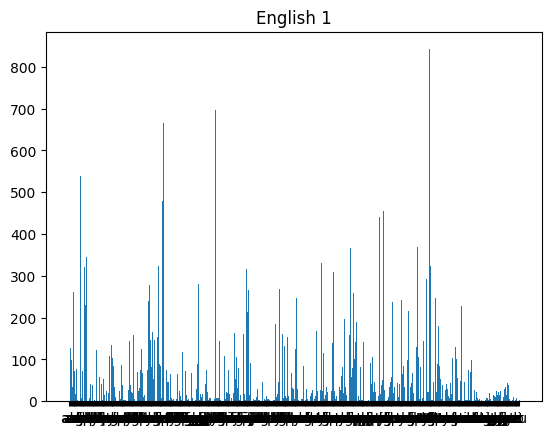

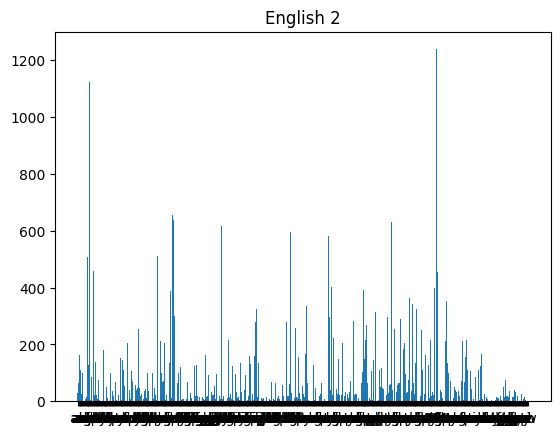

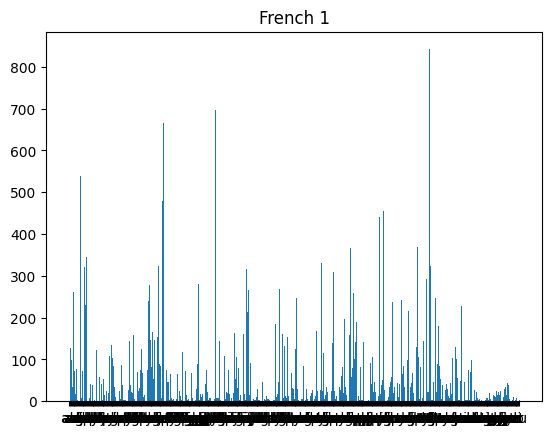

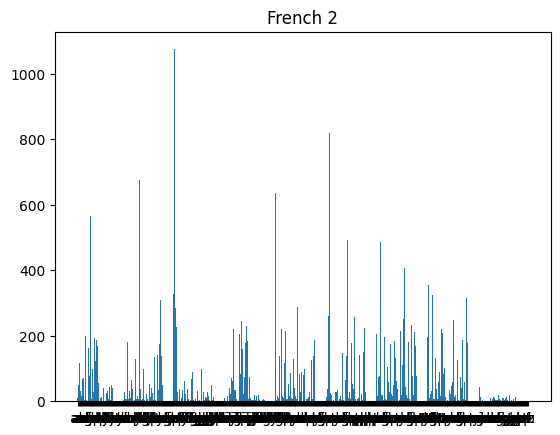

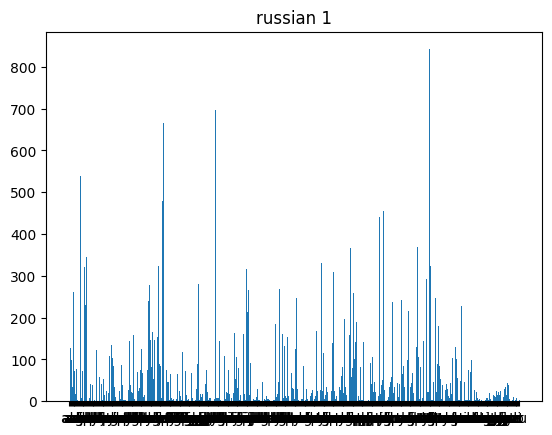

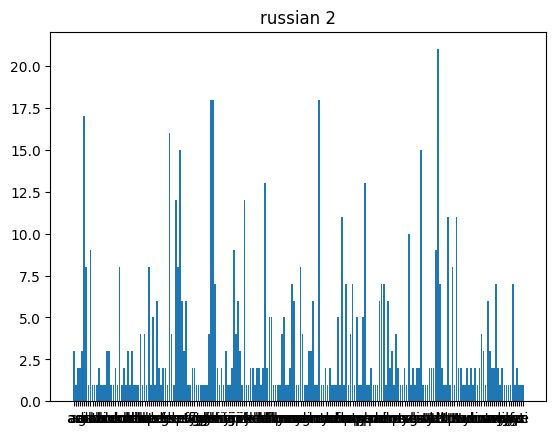

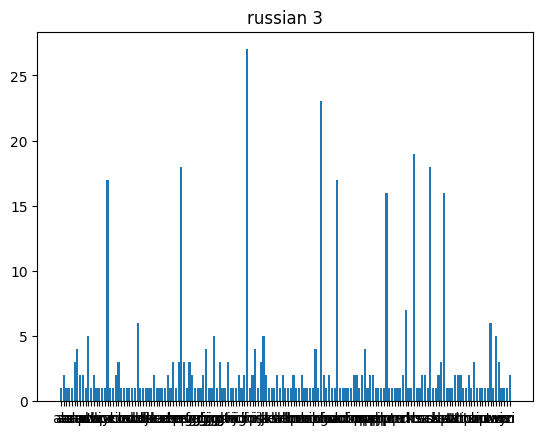

In [47]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

bigram_ru1 = Counter(ngrams(ru1,2))
plothistogram(bigram_eng1)
plt.title('russian 1')
plt.show()

bigram_ru2 = Counter(ngrams(ru2,2))
plothistogram(bigram_ru2)
plt.title('russian 2')
plt.show()

bigram_ru3 = Counter(ngrams(ru3,2))
plothistogram(bigram_ru3)
plt.title('russian 3')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [49]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

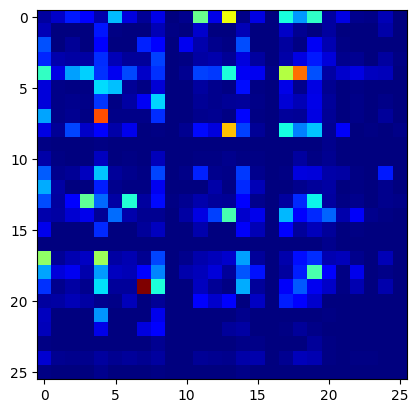

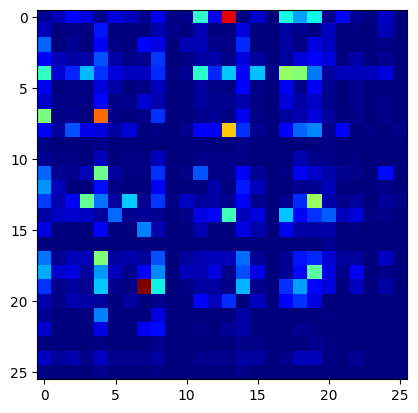

In [50]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)


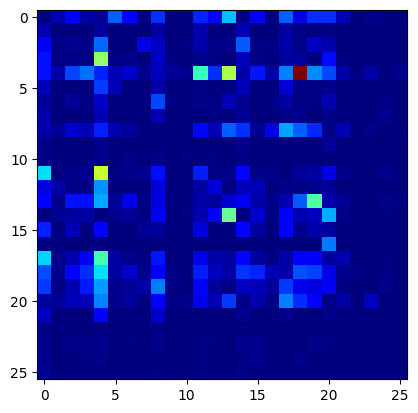

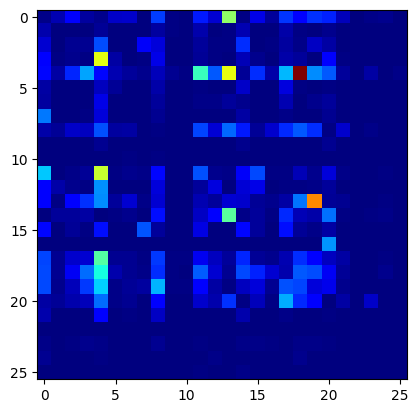

In [51]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

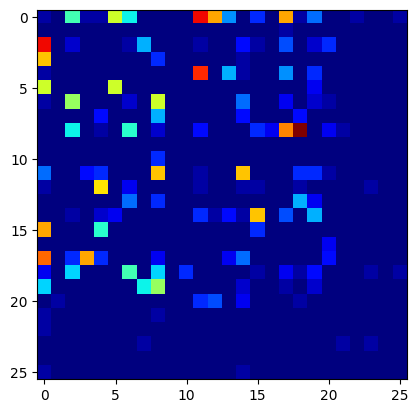

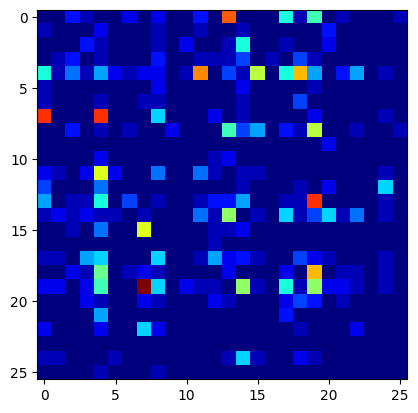

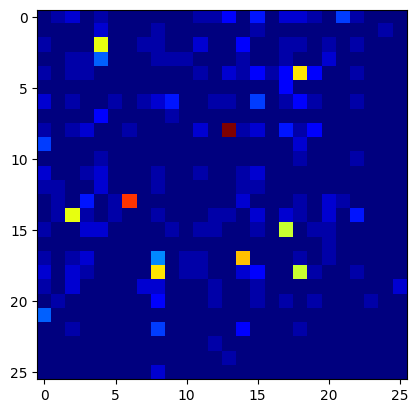

In [52]:
biru1 = plotbihistogram(bigram_ru1)
plt.show()
biru2 = plotbihistogram(bigram_ru2)
plt.show()
biru3 = plotbihistogram(bigram_ru3)


Let us look at the top 10 ngrams for each text.

In [55]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [58]:
def ind2tup_russian(ind):
  ind = int(ind)
  i = int(ind / 33)  # Use 33 as there are 33 letters in the Russian alphabet
  j = int(ind % 33)
  return (chr(ord('а') + i), chr(ord('а') + j))  # Use 'а' (Cyrillic 'a') as the starting character

def ShowTopNrus(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup_russian(arg[ii])} : {f[arg[ii]]}')
print('\nEnglish 1:')
ShowTopN(bieng1)

In [73]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)
# russian language
print('\n russian 1:')
ShowTopNrus(biru1)
print('\n russian 2:')
ShowTopNrus(biru2)
print('\n russian 3:')
ShowTopNrus(biru3)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0

 russian 1:
('ж', 'ь') : 30.0
('б', 'у') : 27.0
('а', 'л') : 27.0
('г', 'р') : 26.0
('н', 'н') : 24.0
('ж', 'ы') : 23.0
('н', 'р') : 22.0
('а', 'с') : 22.0
('л', 'ы') : 22.0
('а', 'м') : 22.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?


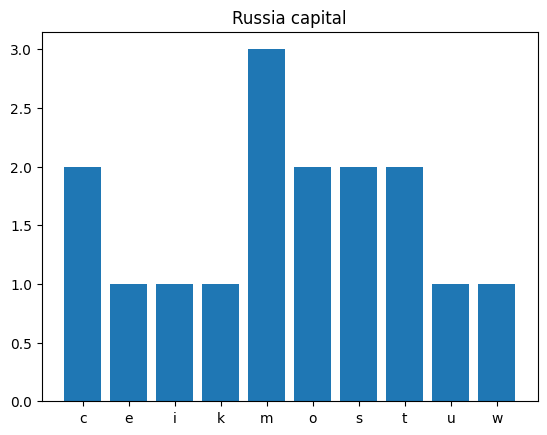

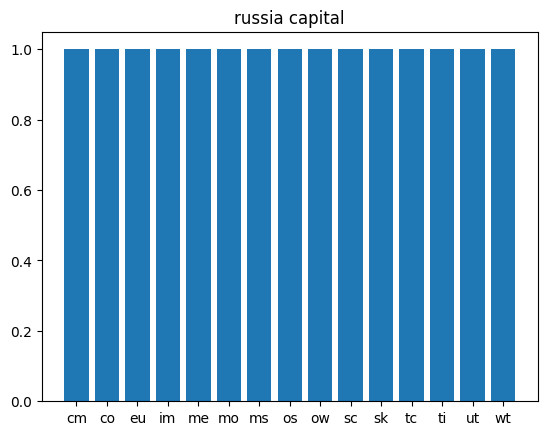


 russia capital:
('ж', 'т') : 29.0
('з', 'а') : 26.0
('т', 'м') : 25.0
('б', 'х') : 21.0
('т', 'ы') : 14.0
('т', 'щ') : 12.0
('р', 'ъ') : 11.0
('ж', 'я') : 7.0
('г', 'р') : 7.0
('п', 'г') : 6.0


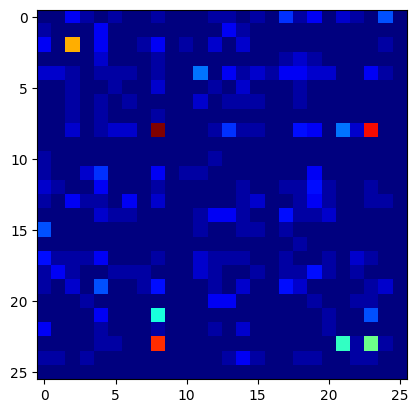

In [125]:
topic = 'moscow'

ru = wikipedia.page(topic).content
ru=cleanup(ru)
unigram_ru = Counter(ngrams(ru,1))
plothistogram(unigram_ru)
plt.title('Russia capital')
plt.show()
bigram_ru = Counter(ngrams(ru,2))
plothistogram(bigram_ru)
plt.title('russia capital')
plt.show()
plt.show()
biru3 = plotbihistogram(bigram_ru3)
print('\n russia capital:')
ShowTopNrus(biru3)

In [62]:
def plottrihistogram(ngram, kk):
  freq = np.zeros((33,33))
  for ii in range(33):
    for jj in range(33):
      freq[ii, jj] = ngram[(chr(ord('a')+kk), chr(ord('a')+ii), chr(ord('a')+jj))]
  return freq

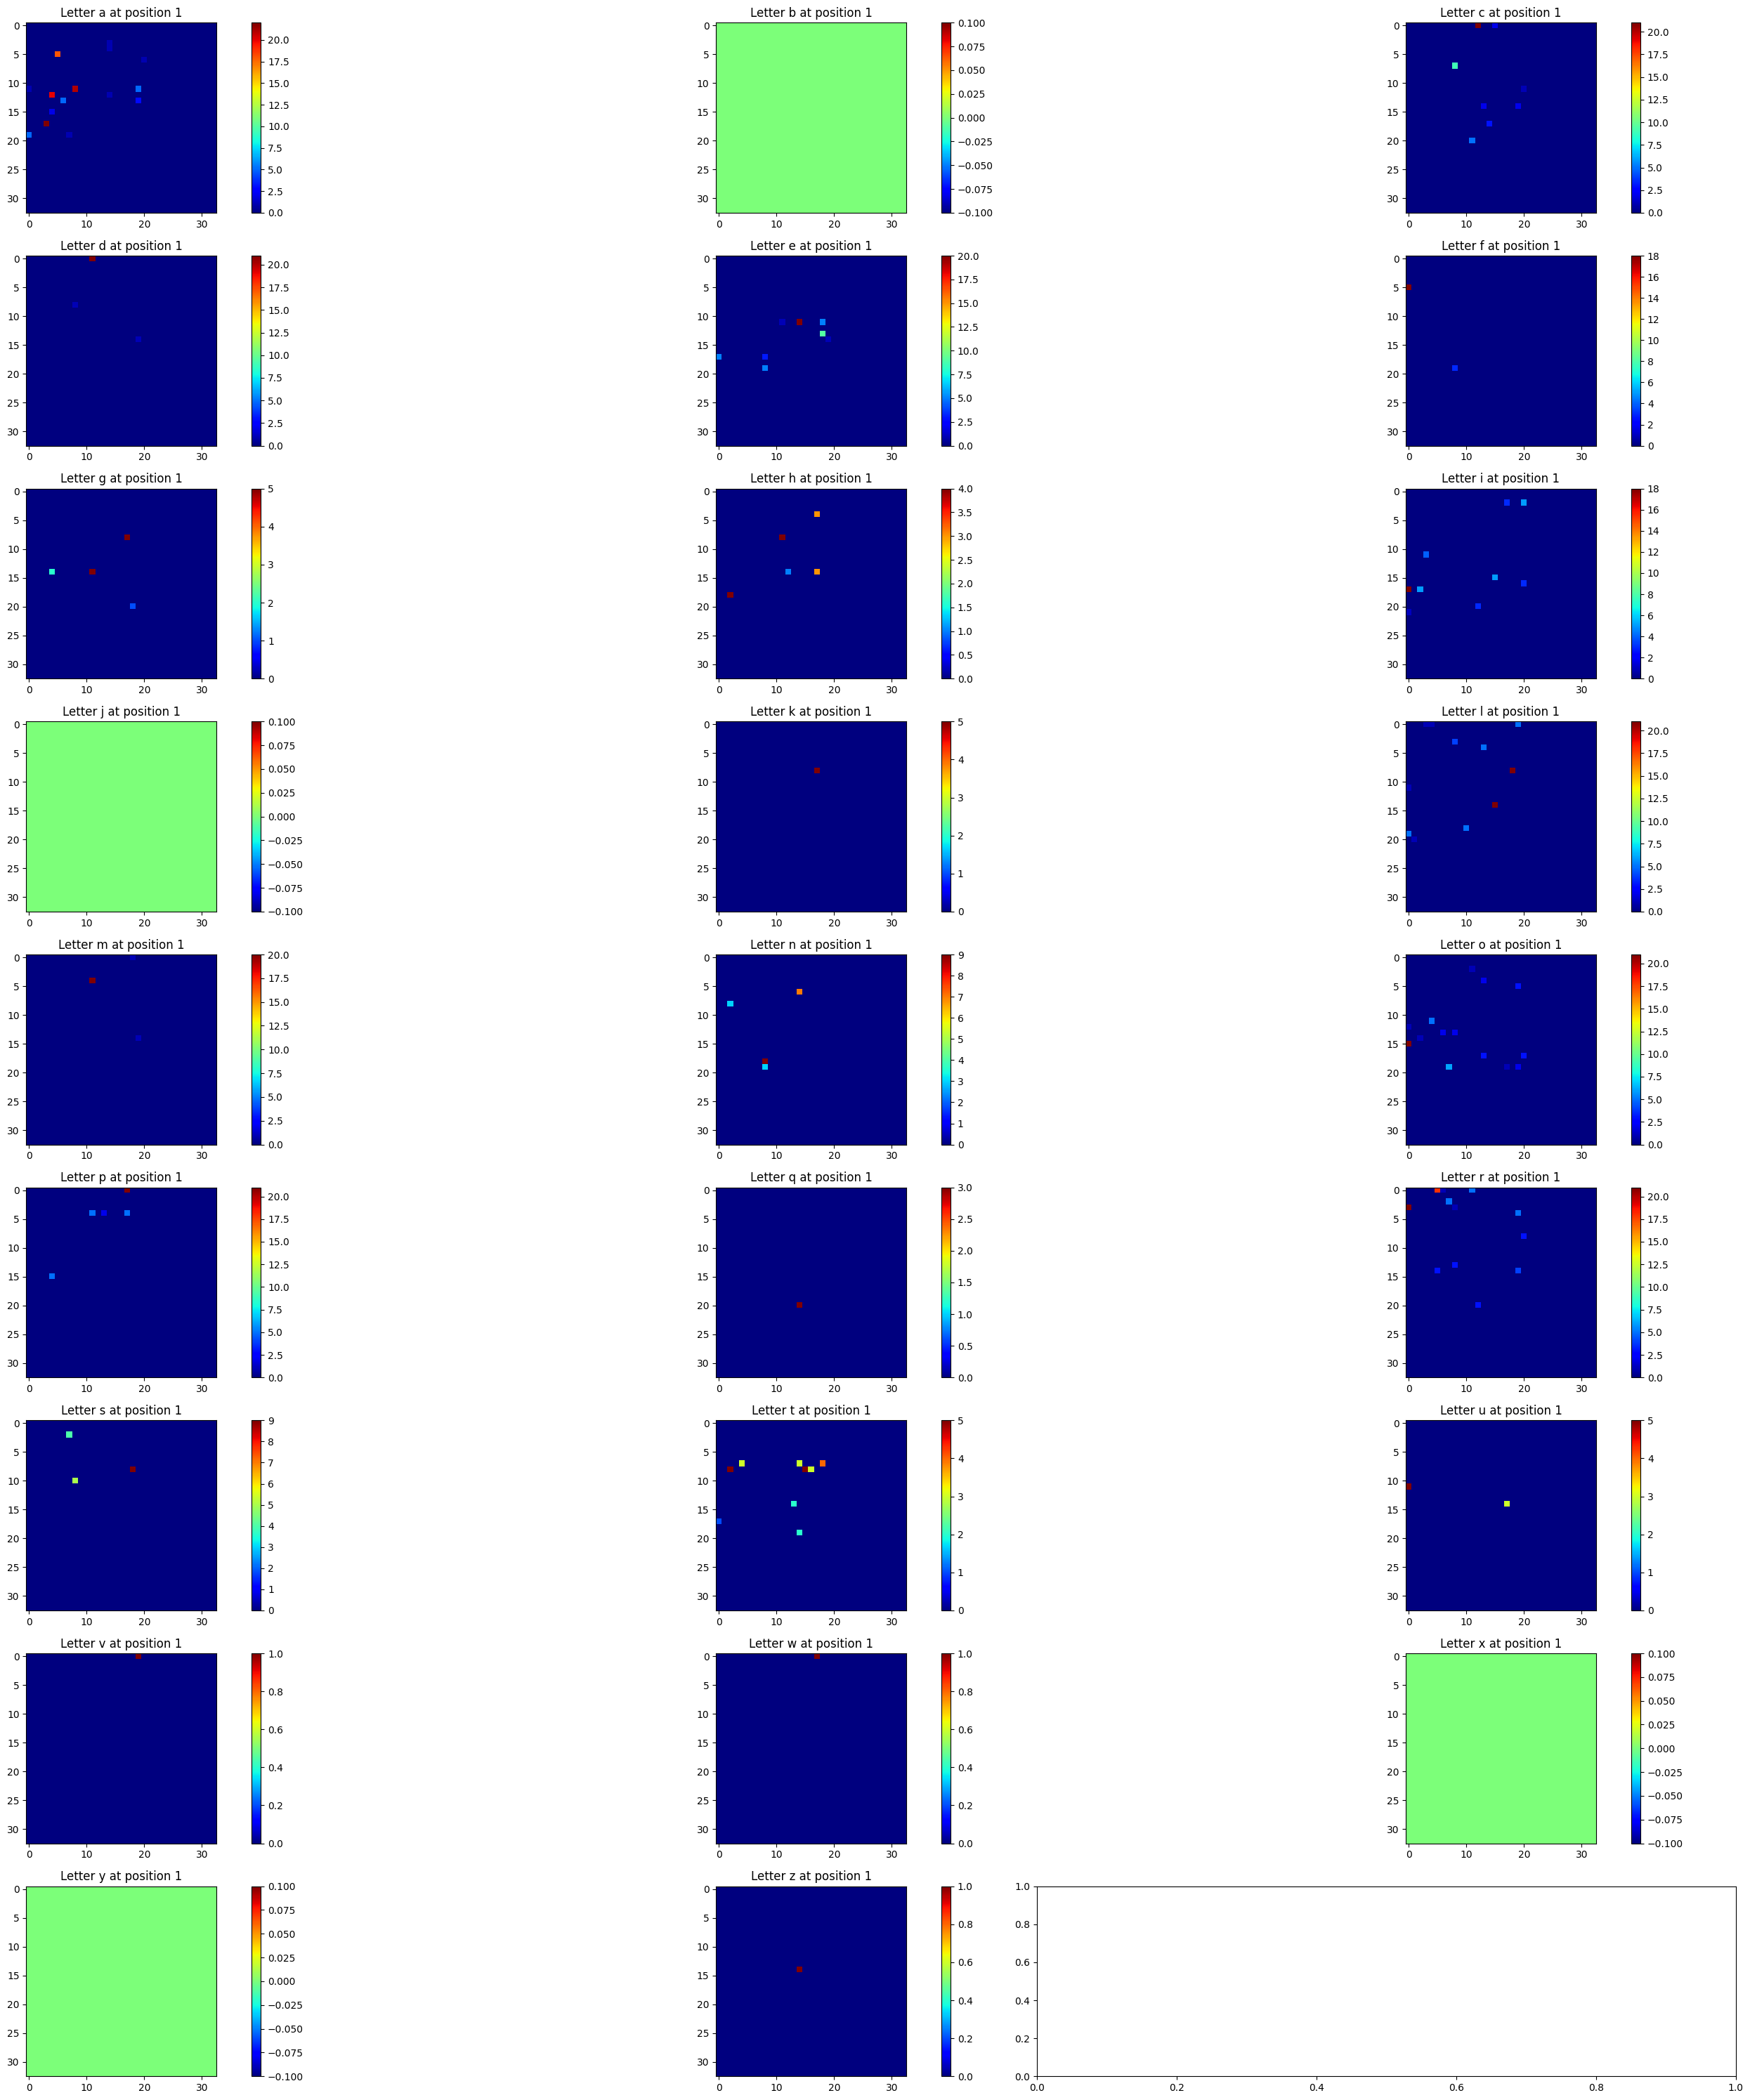

In [66]:
trigram = Counter(ngrams(ru1, 3))

fig, axes = plt.subplots(9, 3, figsize=(30, 30))
axes = axes.ravel()

for i in range(26):
    tride1 = plottrihistogram(trigram, i)
    im = axes[i].imshow(tride1, cmap='jet')
    axes[i].set_title(f'Letter {chr(ord("a")+i)} at position 1')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

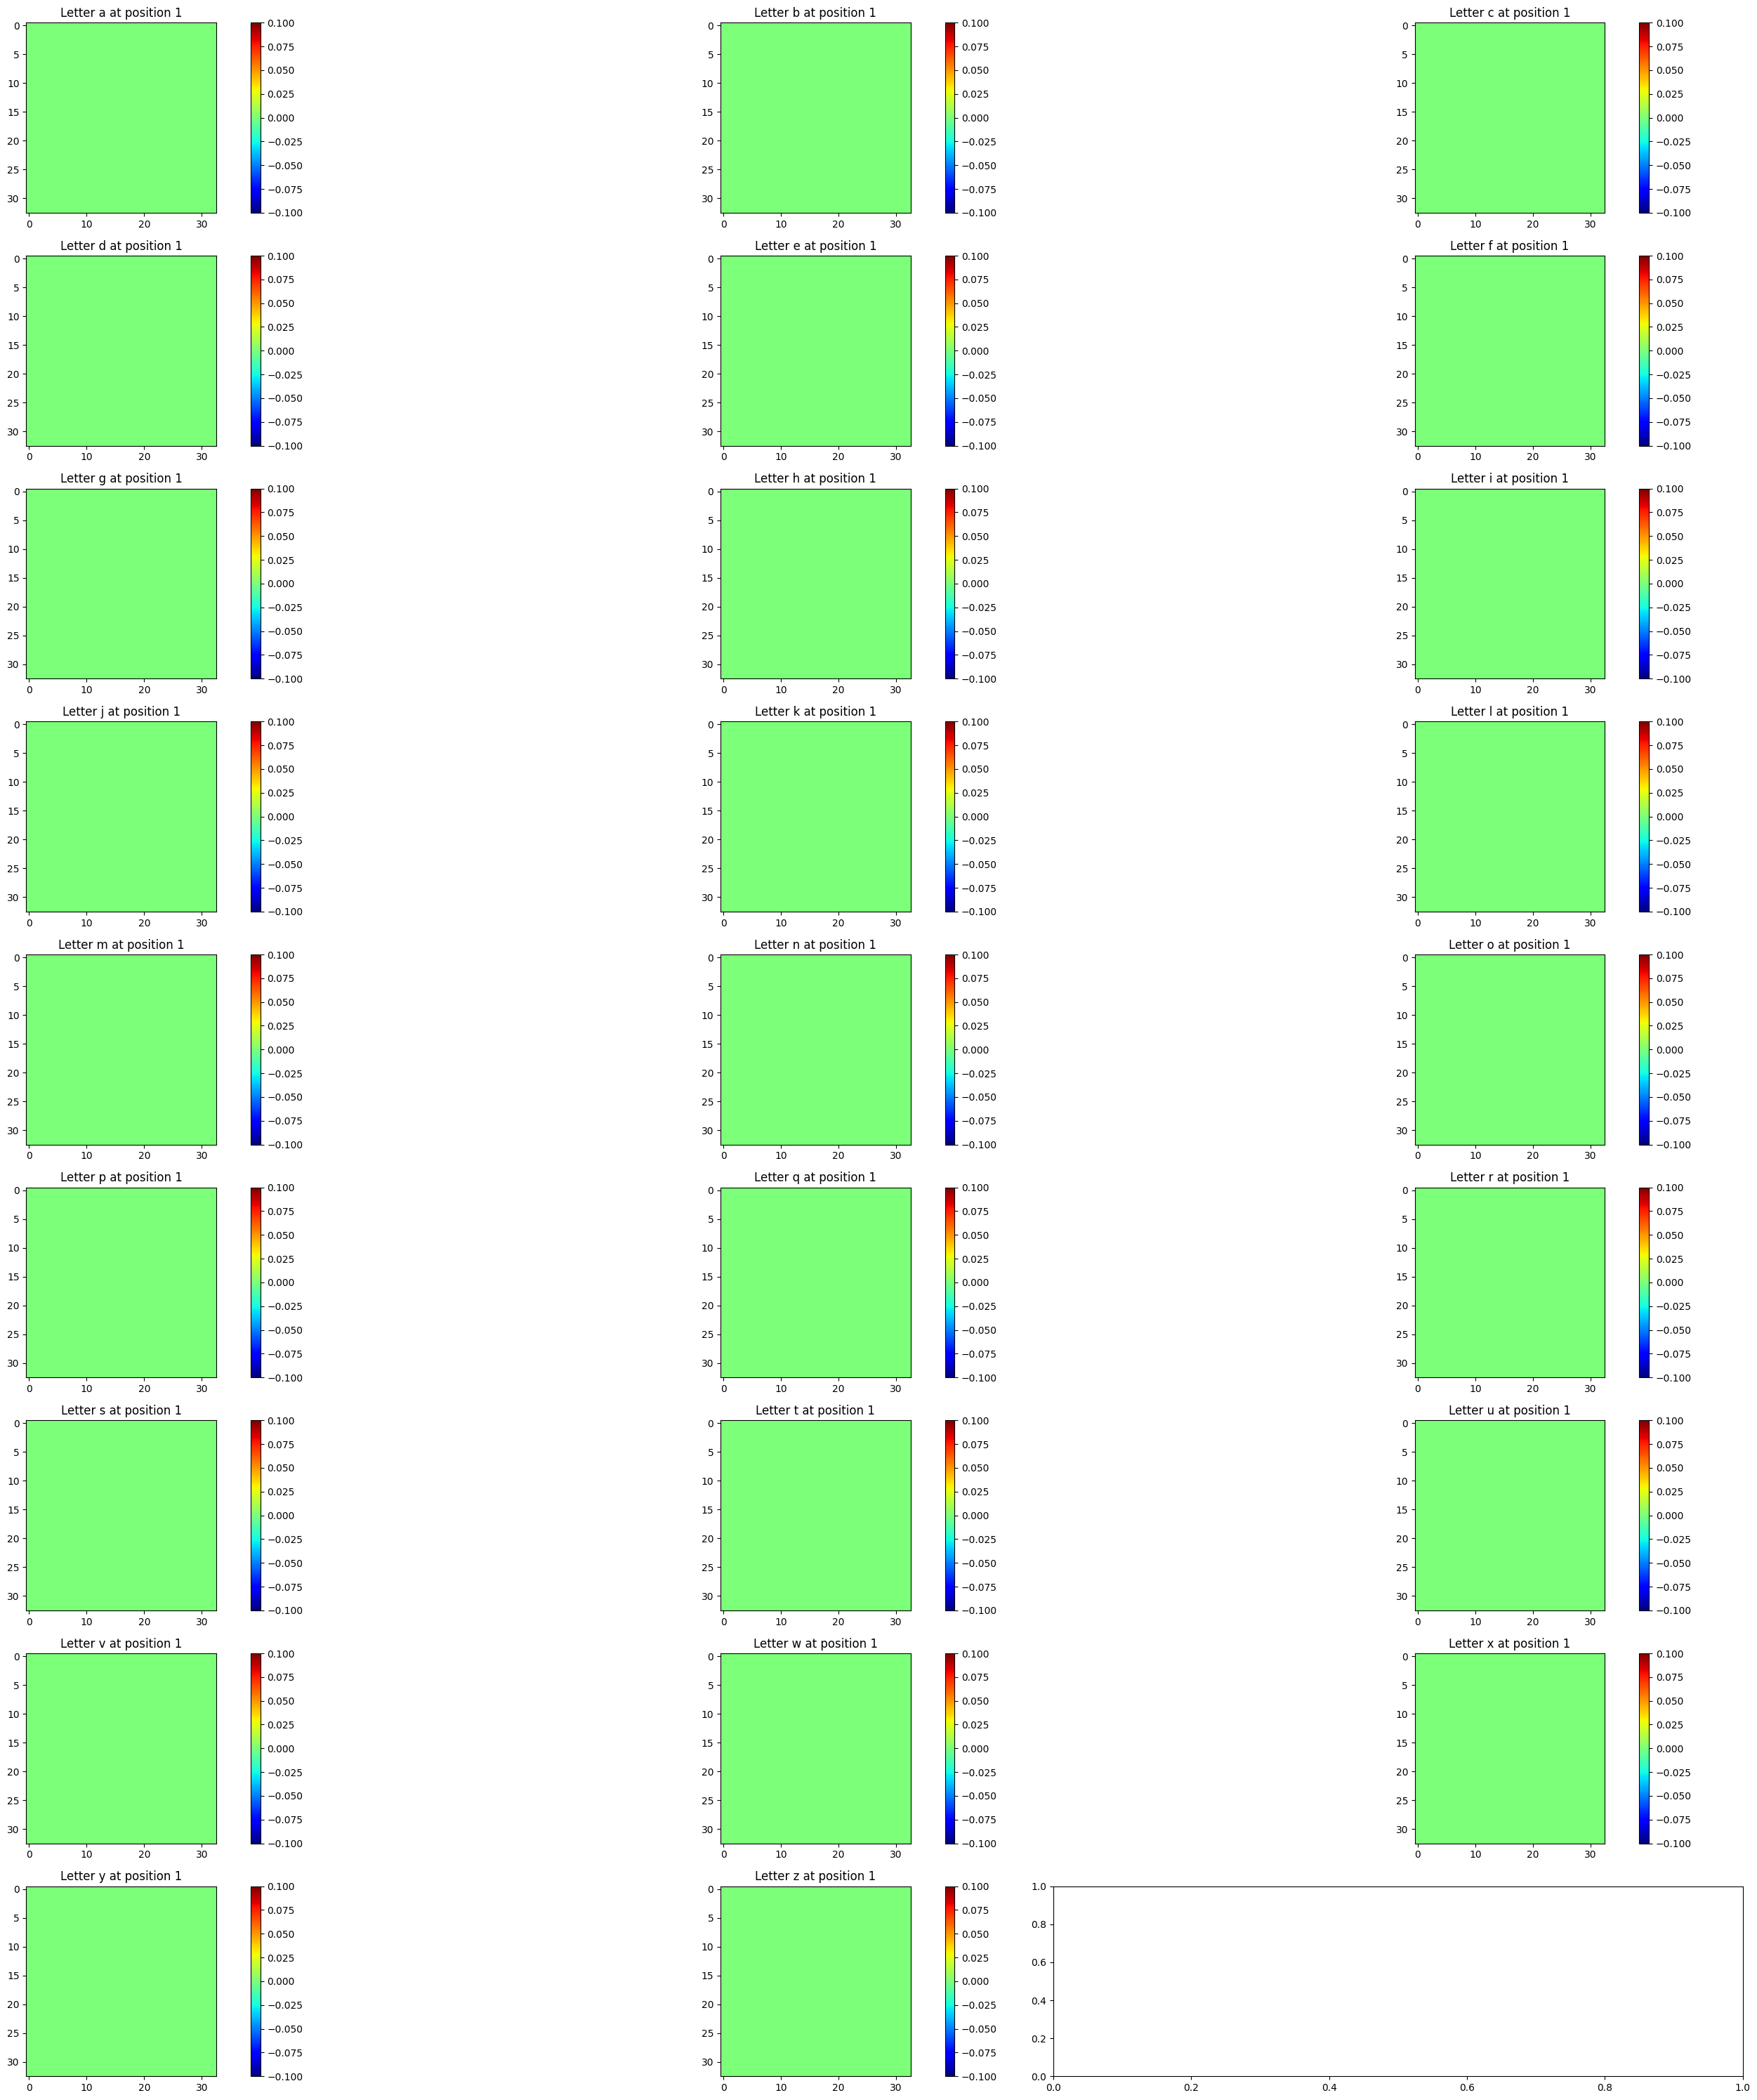

In [67]:
trigram = Counter(ngrams(ru1, 4))

fig, axes = plt.subplots(9, 3, figsize=(30, 30))
axes = axes.ravel()

for i in range(26):
    tride1 = plottrihistogram(trigram, i)
    im = axes[i].imshow(tride1, cmap='jet')
    axes[i].set_title(f'Letter {chr(ord("a")+i)} at position 1')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()
# when 4 words are put together there is no correlation .

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [79]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [80]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

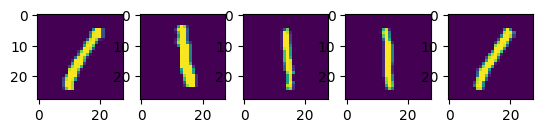

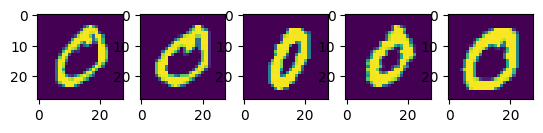

In [81]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [83]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

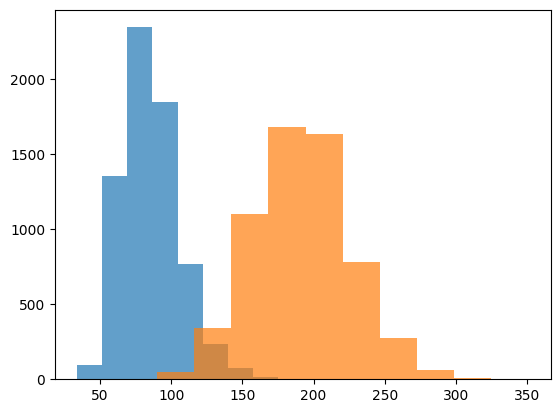

In [84]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [85]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

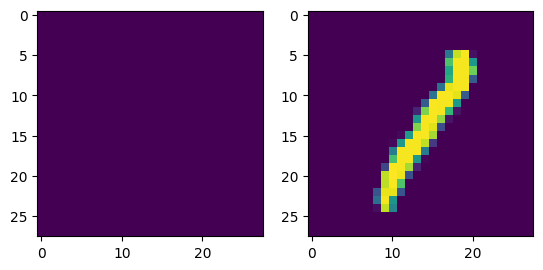

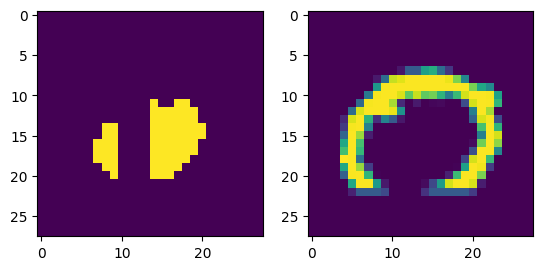

In [86]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

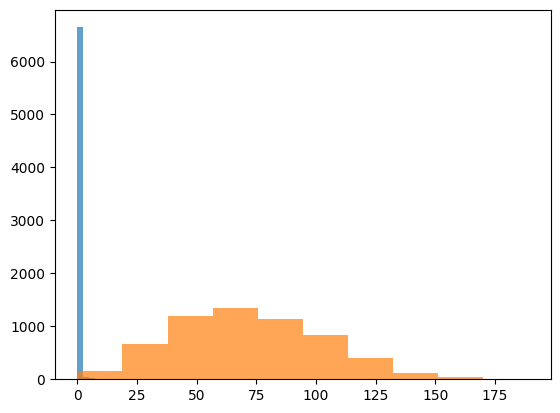

In [87]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [96]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

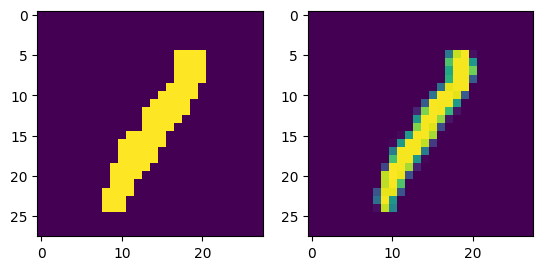

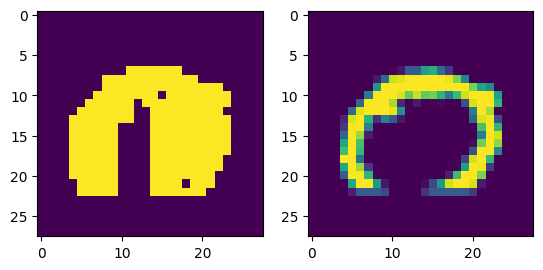

In [89]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

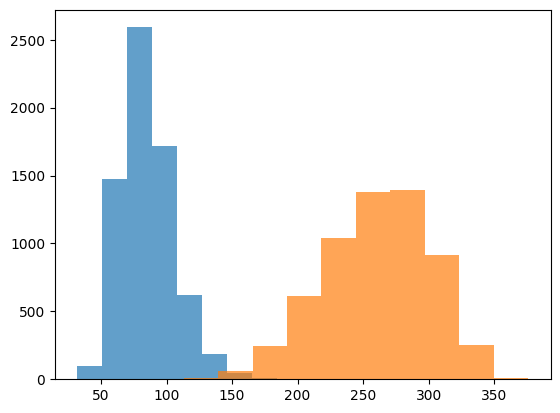

In [90]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [91]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

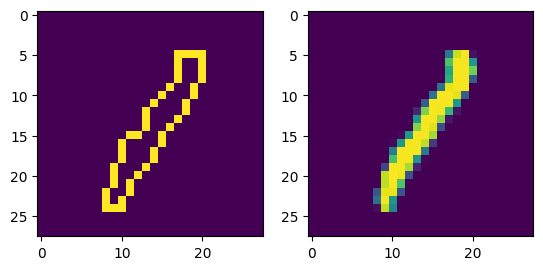

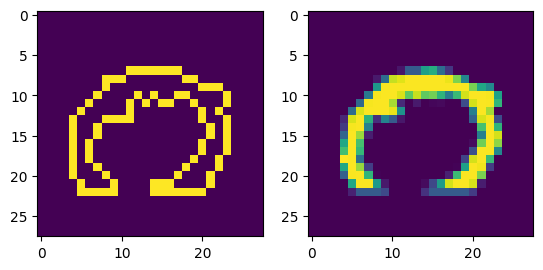

In [92]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

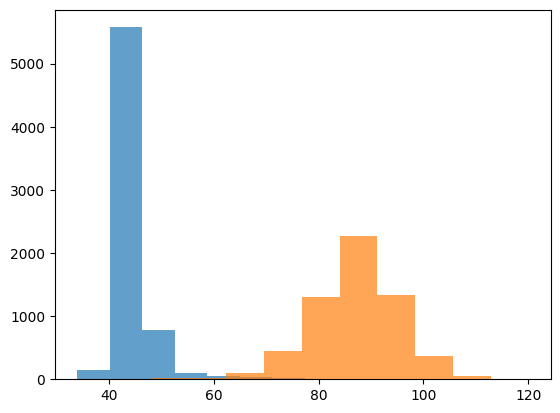

In [93]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

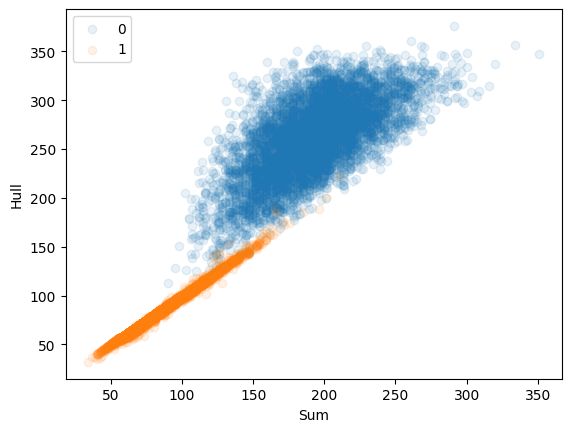

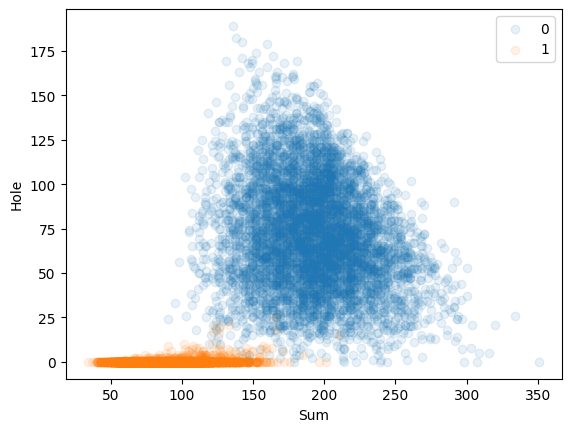

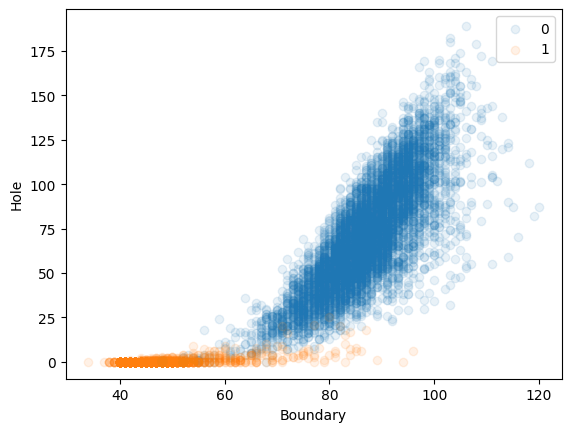

In [94]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [95]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?





1. Which is the best combination of features?

    1. Edge Features/ boundry : The number of edges, edge density, or specific edge patterns within the character can be used as features to distinguish between different characters
    2.hull :hull is the smallest convex shape that encloses all foreground pixels in the binary image, and it can be used for tasks like shape analysis and object recognition.
    3. sum:his feature can provide information about the size or density of objects in an image. It's a basic but effective feature for distinguishing between objects or regions of different sizes.

<ipython-input-98-4608b5ee4193>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



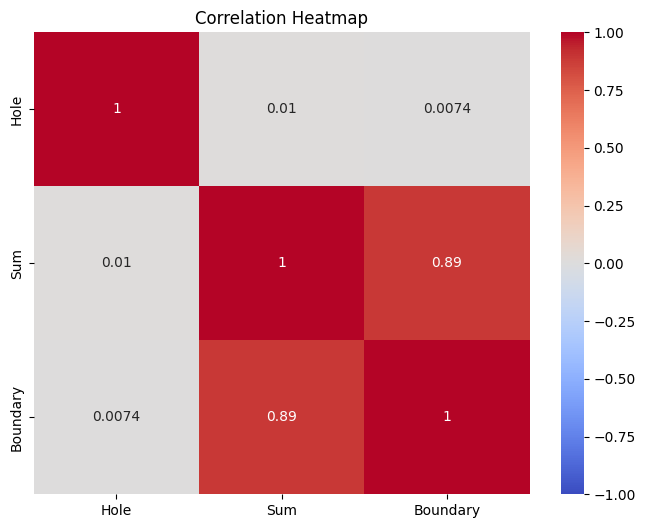

In [98]:
# 2. How would you test or visualize four or more features?

# 2. dimensionality reduction technique that can help you reduce the dimensionality of your
#data while preserving most of the variance. After applying PCA, heatmap is widely used to visualize the larger number of features in 2d format and find the  corr between the features


import seaborn as sns
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


**3. Can you come up with your own features?**
Diagonal features: Measure the presence and length of diagonal lines within the digit image. Some digits, like '7' and '4', have prominent diagonal strokes.




**4. Will these features work for different classes other than 0 and 1?**


In [99]:
no4= train_X[train_y==4,:,:]
no7 = train_X[train_y==7,:,:]

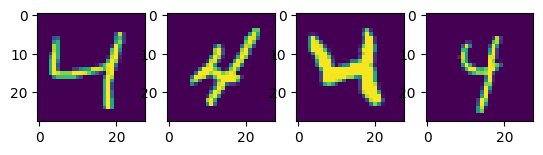

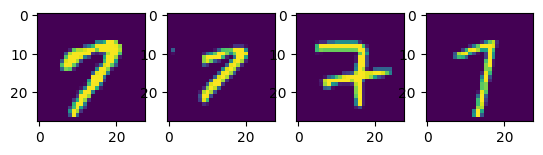

In [104]:
for i in range(4):
  plt.subplot(2, 4, i+1)
  plt.imshow(no4[i, :, :])
plt.show()
for i in range(4):
  plt.subplot(2, 4, i+ 1)
  plt.imshow(no7[i, :, :])
plt.show()

 **sum of the features **

In [117]:
sum4 = np.sum(no4>0, (1,2))

sum7 = np.sum(no7>0, (1,2))

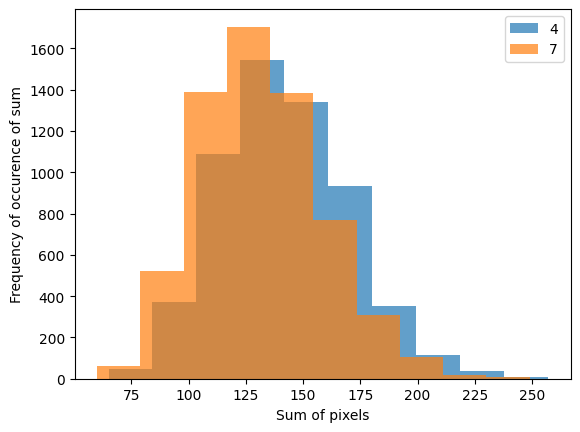

In [109]:
plt.hist(sum4, alpha=0.7, label = '4');
plt.hist(sum7, alpha=0.7, label = '7');
plt.xlabel('Sum of pixels')
plt.ylabel('Frequency of occurence of sum')
plt.legend()

visualizing these two digits along with their respective sum of pixels both digits '4' and '7' have similar sum of pixels, making it challenging to differentiate them based solely on this feature

**hole pixels**


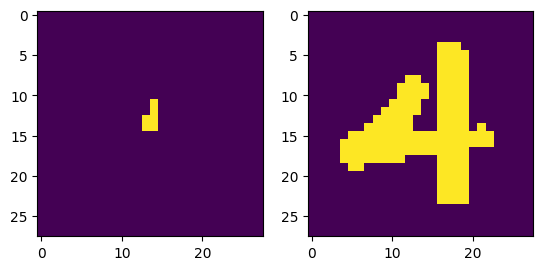

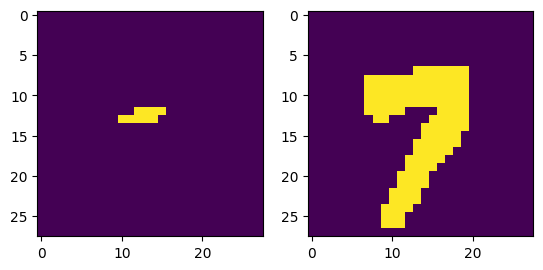

In [110]:
imgs = [no4[405,:,:],  no7[445,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img>0)
  plt.show()

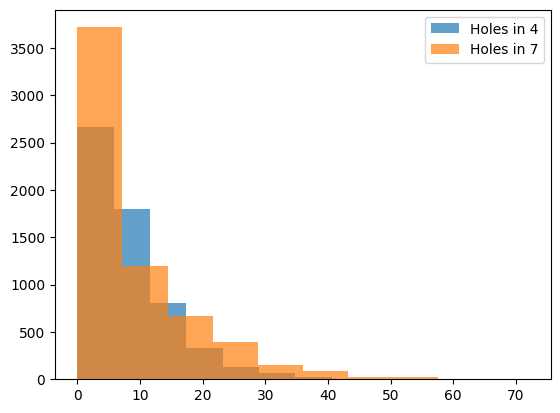

In [111]:
hole4 = np.array([getHolePixels(i).sum() for i in no4])
hole7 = np.array([getHolePixels(i).sum() for i in no7])

plt.hist(hole4, alpha=0.7, label = 'Holes in 4');
plt.hist(hole7, alpha=0.7, label = 'Holes in 7');
plt.legend()

**even with this approximation, we can see that digits '4' and '7' may have similar numbers of hole pixels, making it challenging to differentiate them based solely on this feature.**


*Hull pixels feature*


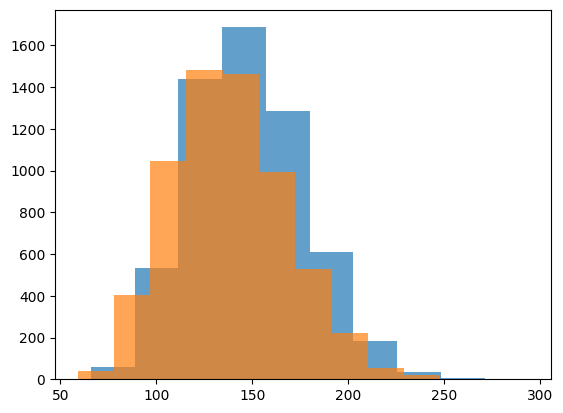

In [112]:
hull4 = np.array([getHullPixels(i).sum() for i in no4])
hull7 = np.array([getHullPixels(i).sum() for i in no7])

plt.hist(hull4, alpha=0.7);
plt.hist(hull7, alpha=0.7);

*boundary pixels*


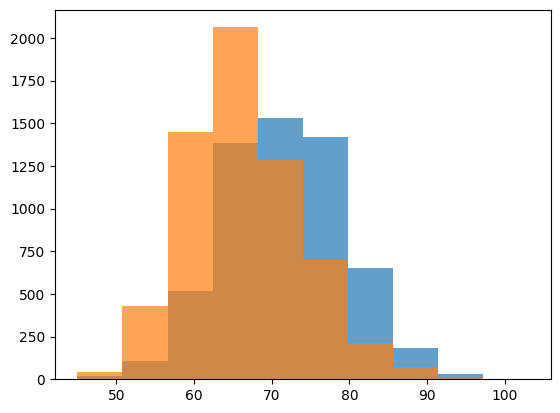

In [114]:
bound4= np.array([getBoundaryPixels(i).sum() for i in no4])
bound7= np.array([getBoundaryPixels(i).sum() for i in no7])

plt.hist(bound4, alpha=0.7);
plt.hist(bound7, alpha=0.7);

**5. What will happen if we take more than two classes at a time?**


In [118]:
no9 = train_X[train_y==9, :, :]
sum9 = np.sum(no9>0, (1,2))


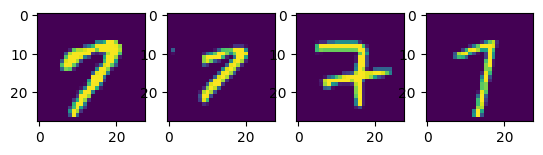

<ipython-input-119-019bc93be07b>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



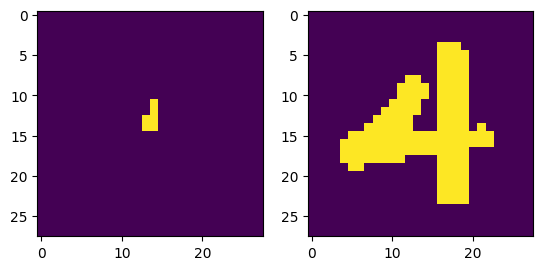

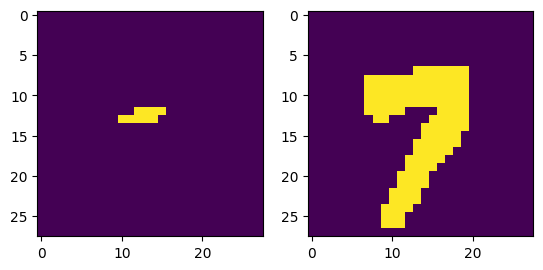

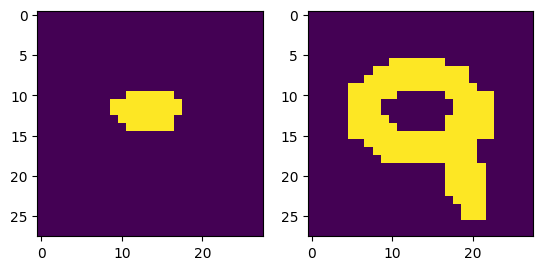

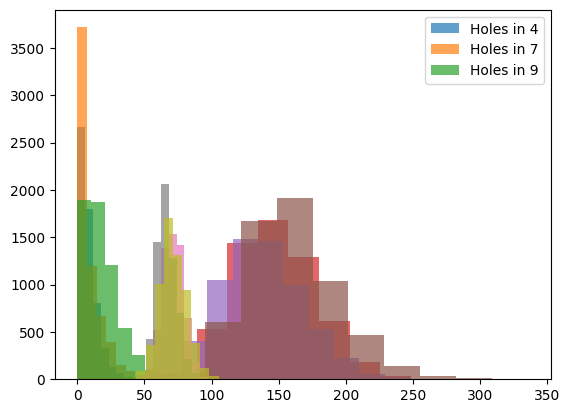

In [119]:
for i in range(4):
  plt.subplot(2, 4, i+ 1)
  plt.imshow(no7[i, :, :])
plt.show()
plt.hist(sum4, alpha=0.7, label = '4');
plt.hist(sum7, alpha=0.7, label = '7');
plt.hist(sum9, alpha=0.7, label = '9');
plt.xlabel('Sum of pixels')
plt.ylabel('Frequency of occurence of sum')
plt.legend()

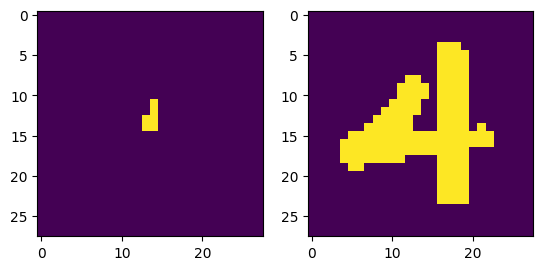

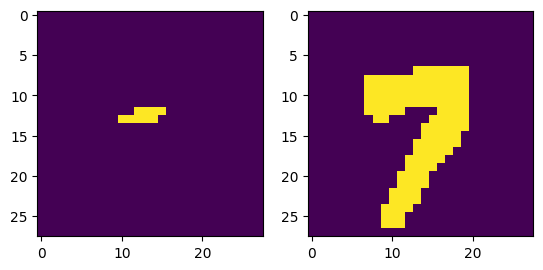

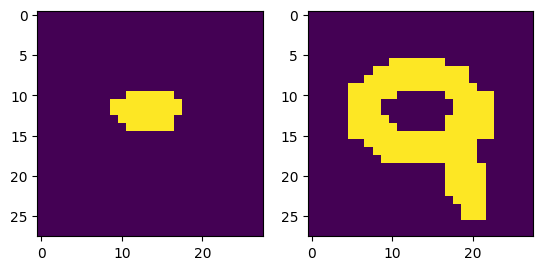

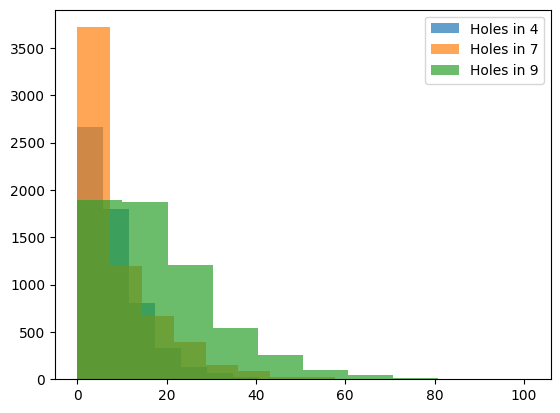

In [120]:
imgs = [no4[405,:,:],  no7[445,:,:],no9[455,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img>0)
  plt.show()

hole4 = np.array([getHolePixels(i).sum() for i in no4])
hole7 = np.array([getHolePixels(i).sum() for i in no7])
hole9 = np.array([getHolePixels(i).sum() for i in no9])
plt.hist(hole4, alpha=0.7, label = 'Holes in 4');
plt.hist(hole7, alpha=0.7, label = 'Holes in 7');
plt.hist(hole9, alpha=0.7, label = 'Holes in 9');
plt.legend()

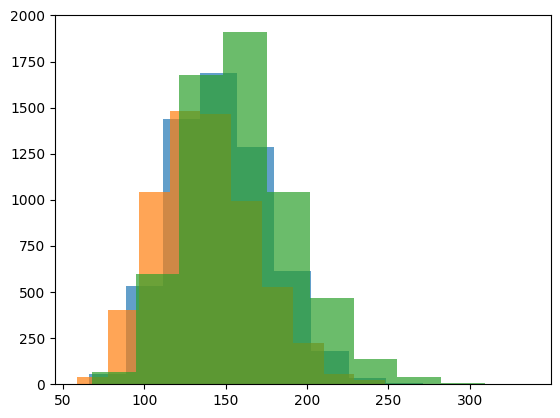

In [121]:
hull4 = np.array([getHullPixels(i).sum() for i in no4])
hull7 = np.array([getHullPixels(i).sum() for i in no7])
hull9 = np.array([getHullPixels(i).sum() for i in no9])
plt.hist(hull4, alpha=0.7);
plt.hist(hull7, alpha=0.7);
plt.hist(hull9, alpha=0.7);

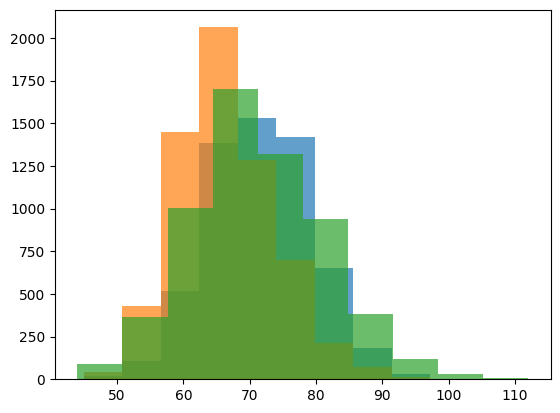

In [122]:
bound4= np.array([getBoundaryPixels(i).sum() for i in no4])
bound7= np.array([getBoundaryPixels(i).sum() for i in no7])
bound9= np.array([getBoundaryPixels(i).sum() for i in no9])
plt.hist(bound4, alpha=0.7);
plt.hist(bound7, alpha=0.7);
plt.hist(bound9, alpha=0.7);

*distinguishing between digits '4,' '7,' and '9' based solely on features like the sum of pixels or hole pixels can be challenging, especially when considering various combinations of these digits*
